<a href="https://colab.research.google.com/github/lucaznguyen/medical-paper/blob/main/MIMIC_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [11]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, log_loss
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import QuantileTransformer
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

from sklearn_pandas import DataFrameMapper, gen_features

from sklearn.decomposition import PCA

import plotly.express as px

import xgboost as xgb

# Import data

In [25]:
data = pd.read_csv("full_cohort_data.csv") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aline_flg           1776 non-null   int64  
 1   icu_los_day         1776 non-null   float64
 2   hospital_los_day    1776 non-null   int64  
 3   age                 1776 non-null   float64
 4   gender_num          1775 non-null   float64
 5   weight_first        1666 non-null   float64
 6   bmi                 1310 non-null   float64
 7   sapsi_first         1691 non-null   float64
 8   sofa_first          1770 non-null   float64
 9   service_unit        1776 non-null   object 
 10  service_num         1776 non-null   int64  
 11  day_icu_intime      1776 non-null   object 
 12  day_icu_intime_num  1776 non-null   int64  
 13  hour_icu_intime     1776 non-null   int64  
 14  hosp_exp_flg        1776 non-null   int64  
 15  icu_exp_flg         1776 non-null   int64  
 16  day_28

In [48]:
data.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1.0,75.0,29.912791,15.0,9.0,SICU,...,354.0,138.0,4.6,15.0,109.0,41.0,1.6,196.0,39.0,2230.875000
1,0,1.14,1,64.92076,0.0,55.0,20.121312,NaN,5.0,MICU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.000000
2,0,2.86,5,36.50000,0.0,70.0,27.118272,16.0,5.0,MICU,...,295.0,144.0,3.9,17.0,101.0,16.0,0.8,298.0,30.0,2086.800293
3,1,0.58,3,44.49191,0.0,NaN,NaN,21.0,7.0,SICU,...,262.0,139.0,4.2,31.0,100.0,16.0,0.5,146.0,23.0,NaN
4,1,1.75,5,23.74217,1.0,95.2,28.464563,18.0,7.0,SICU,...,22.0,146.0,3.4,19.0,110.0,10.0,1.0,134.0,30.0,2358.244141


In [49]:
data.describe()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
count,1776.000000,1776.000000,1776.000000,1776.000000,1775.000000,1666.000000,1310.000000,1691.000000,1770.000000,1776.000000,...,1768.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1770.000000,1590.000000,1590.000000,1633.000000
mean,0.554054,3.346498,8.110923,54.379660,0.577465,80.075948,27.827316,14.136606,5.820904,0.552928,...,246.083145,139.559006,4.107623,24.416657,103.839074,19.277809,1.095706,227.623270,43.413836,1622.907946
std,0.497210,3.356261,8.157159,21.062854,0.494102,22.490516,8.210074,4.114302,2.334666,0.497331,...,99.865469,4.726209,0.794724,4.992172,5.734283,14.366890,1.083477,144.863403,13.980786,1677.129157
min,0.000000,0.500000,1.000000,15.180230,0.000000,30.000000,12.784877,3.000000,0.000000,0.000000,...,7.000000,105.000000,1.900000,2.000000,78.000000,2.000000,0.000000,22.000000,8.000000,0.000000
25%,0.000000,1.370000,3.000000,38.247318,0.000000,65.400000,22.617307,11.000000,4.000000,0.000000,...,182.000000,137.000000,3.600000,22.000000,101.000000,11.000000,0.700000,108.000000,36.000000,329.750000
50%,1.000000,2.185000,6.000000,53.678585,1.000000,77.000000,26.324846,14.000000,6.000000,1.000000,...,239.000000,140.000000,4.000000,24.000000,104.000000,15.000000,0.900000,195.000000,41.000000,1081.529175
75%,1.000000,4.002500,10.000000,72.762992,1.000000,90.000000,30.796551,17.000000,7.000000,1.000000,...,297.000000,142.000000,4.400000,27.000000,107.000000,22.000000,1.100000,323.000000,47.000000,2493.900146
max,1.000000,28.240000,112.000000,99.110950,1.000000,257.600000,98.797134,32.000000,17.000000,1.000000,...,988.000000,165.000000,9.800000,62.000000,133.000000,139.000000,18.300000,634.000000,158.000000,13910.000000


In [50]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values, columns=['null'])
j=1
sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent', ascending=False)

,null,percent
bmi,46600,26.239
pco2_first,18600,10.473
po2_first,18600,10.473
iv_day_1,14300,8.052
weight_first,11000,6.194
sapsi_first,8500,4.786
wbc_first,800,0.450
hgb_first,800,0.450
platelet_first,800,0.450
sofa_first,600,0.338


# Deal with missing data

In [51]:
data = data.dropna()

In [52]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values, columns=['null'])
j=1
sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent', ascending=False)

,null,percent
aline_flg,0,0.0
wbc_first,0,0.0
cad_flg,0,0.0
stroke_flg,0,0.0
mal_flg,0,0.0
resp_flg,0,0.0
map_1st,0,0.0
hr_1st,0,0.0
temp_1st,0,0.0
spo2_1st,0,0.0


In [94]:
data_dummy = pd.get_dummies(data)

In [95]:
data_dummy.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,...,service_unit_FICU,service_unit_MICU,service_unit_SICU,day_icu_intime_Friday,day_icu_intime_Monday,day_icu_intime_Saturday,day_icu_intime_Sunday,day_icu_intime_Thursday,day_icu_intime_Tuesday,day_icu_intime_Wednesday
0,1,7.63,13,72.36841,1.0,75.0,29.912791,15.0,9.0,1,...,0,0,1,1,0,0,0,0,0,0
2,0,2.86,5,36.50000,0.0,70.0,27.118272,16.0,5.0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,1.75,5,23.74217,1.0,95.2,28.464563,18.0,7.0,1,...,0,0,1,0,0,1,0,0,0,0
6,1,7.06,27,24.64717,1.0,90.0,25.474850,15.0,6.0,1,...,0,0,1,0,0,1,0,0,0,0
7,1,15.30,33,78.15970,0.0,69.7,27.219757,16.0,8.0,0,...,0,1,0,0,0,0,0,1,0,0


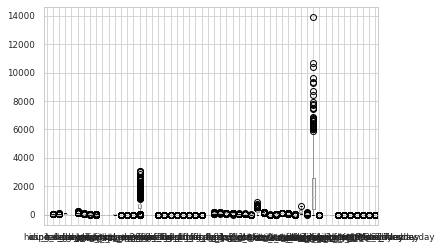

In [115]:
data_dummy.boxplot()

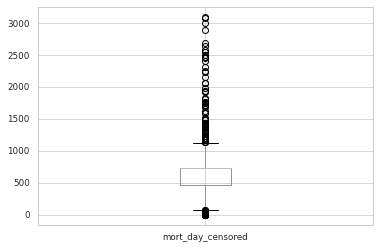

In [108]:
pd.DataFrame(data_dummy['mort_day_censored']).boxplot()

In [133]:
cols = ['iv_day_1'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = data_dummy[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = data_dummy[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((data_dummy[cols] < (Q1 - 1.5 * IQR)) | (data_dummy[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
data_filtered = data_dummy[condition]

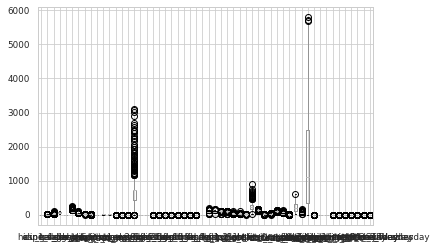

In [134]:
data_filtered.boxplot()

In [135]:
y = data_filtered.loc[:,'day_28_flg']
X = data_filtered.drop(['day_28_flg'], axis=1)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [137]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

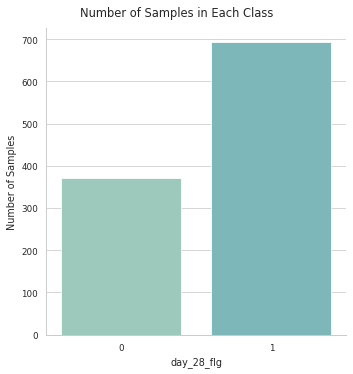

In [138]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='aline_flg', data=data, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='day_28_flg')
plt.savefig("class.png")
plt.show()

In [139]:
models = {
    '           Linear SVM': LinearSVC(),
    '        XGBClassifier': xgb.XGBClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier(),
    '                  svc':       SVC()
}

for name, model in models.items():
    model = model.fit(X_train, y_train)
    print(name + " trained")

           Linear SVM trained
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained
                  svc trained


In [140]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

           Linear SVM: 99.03%
        XGBClassifier: 99.52%
    Gradient Boosting: 99.52%
        Decision Tree: 99.52%
        Random Forest: 99.52%
 KNeighborsClassifier: 97.10%
   Bagging Classifier: 99.52%
                  svc: 98.55%


In [141]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [142]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

In [144]:
models = {
    '           Linear SVM': LinearSVC(),
    '        XGBClassifier': xgb.XGBClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier(),
    '                  svc':       SVC()
}

for name, model in models.items():
    model = model.fit(X_train_SMOTE, y_train_SMOTE)
    print(name + " trained")

           Linear SVM trained
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained
                  svc trained


In [145]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

           Linear SVM: 96.14%
        XGBClassifier: 99.52%
    Gradient Boosting: 99.52%
        Decision Tree: 99.52%
        Random Forest: 99.52%
 KNeighborsClassifier: 92.27%
   Bagging Classifier: 99.03%
                  svc: 96.14%


#Correlation

In [148]:
data_remove_label = data_filtered.drop(['day_28_flg'], axis=1)

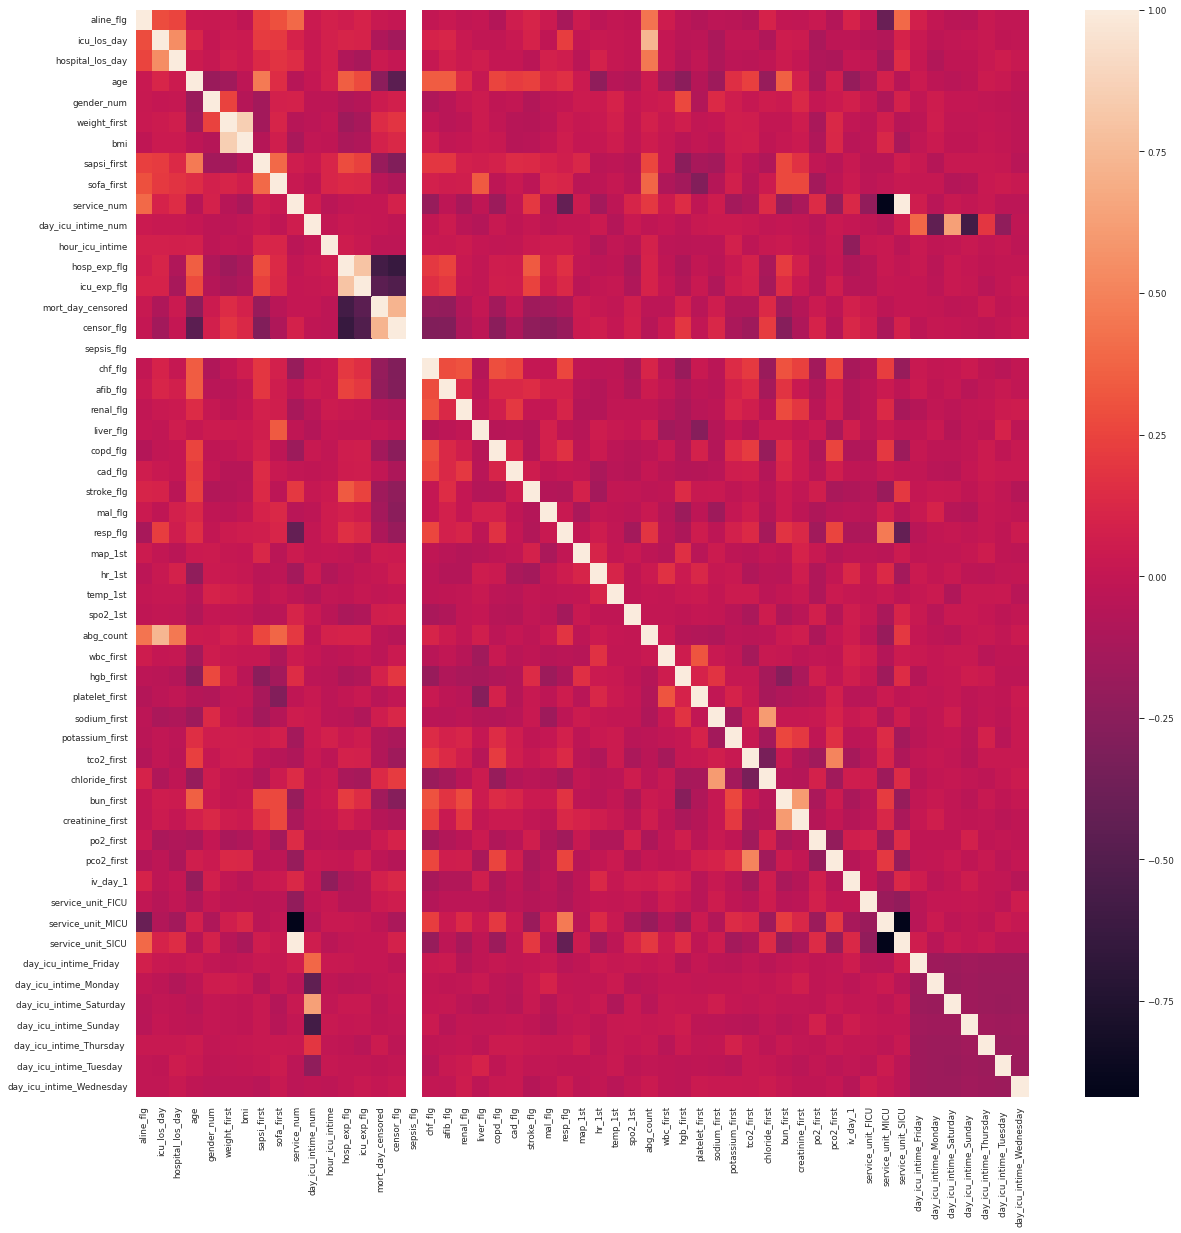

In [149]:
plt.figure(figsize=(20,20))
sns.heatmap(data_remove_label.corr())

plt.savefig("heatmap_full.png")

In [150]:
data_remove_label[data_remove_label.columns[0:20]].corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,icu_exp_flg,mort_day_censored,censor_flg,sepsis_flg,chf_flg,afib_flg,renal_flg
aline_flg,1.000000,0.283858,0.252593,0.032601,0.022014,0.026926,-0.013629,0.231273,0.296738,0.397930,0.034585,0.083798,0.055705,0.097031,0.018339,0.005685,nan,-0.004168,0.029761,-0.007089
icu_los_day,0.283858,1.000000,0.543382,0.108785,0.002929,0.043209,0.035041,0.215223,0.206026,0.096713,0.021222,0.083688,0.107248,0.093134,-0.091253,-0.141476,nan,0.093637,0.113714,0.031703
hospital_los_day,0.252593,0.543382,1.000000,0.042630,0.015371,0.067366,0.038840,0.134860,0.175648,0.146242,0.022688,0.071175,-0.082646,-0.123010,0.038872,0.003245,nan,0.014873,0.072421,0.038966
age,0.032601,0.108785,0.042630,1.000000,-0.180687,-0.153270,-0.024063,0.462860,0.148231,-0.051129,0.007613,0.084620,0.353979,0.273857,-0.242061,-0.465627,nan,0.344879,0.344988,0.145256
gender_num,0.022014,0.002929,0.015371,-0.180687,1.000000,0.243068,-0.061526,-0.146226,0.082419,0.088612,-0.020096,-0.024874,-0.080893,-0.062231,0.042184,0.071383,nan,-0.082115,-0.046306,0.015562
weight_first,0.026926,0.043209,0.067366,-0.153270,0.243068,1.000000,0.851387,-0.146427,0.101525,-0.056496,-0.029700,-0.002153,-0.164198,-0.121128,0.137799,0.187852,nan,-0.010467,-0.048775,-0.025695
bmi,-0.013629,0.035041,0.038840,-0.024063,-0.061526,0.851387,1.000000,-0.057323,0.069100,-0.110171,-0.011071,-0.017007,-0.107828,-0.080425,0.089358,0.126712,nan,0.058721,-0.006326,0.003559
sapsi_first,0.231273,0.215223,0.134860,0.462860,-0.146226,-0.146427,-0.057323,1.000000,0.397099,0.055525,0.032452,0.111994,0.285411,0.242214,-0.185638,-0.293417,nan,0.190987,0.196735,0.082852
sofa_first,0.296738,0.206026,0.175648,0.148231,0.082419,0.101525,0.069100,0.397099,1.000000,0.017933,-0.016879,0.109989,0.132904,0.123384,-0.042391,-0.093127,nan,0.079901,0.059633,0.068665
service_num,0.397930,0.096713,0.146242,-0.051129,0.088612,-0.056496,-0.110171,0.055525,0.017933,1.000000,0.060334,-0.036589,-0.009105,0.006047,0.007828,0.085636,nan,-0.195888,-0.024980,-0.122640


In [151]:
corr=data_remove_label.corr().abs()

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

data_drop = data_remove_label.copy()

# Drop features 
for column in to_drop:  
  data_drop=data_drop.drop(column,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


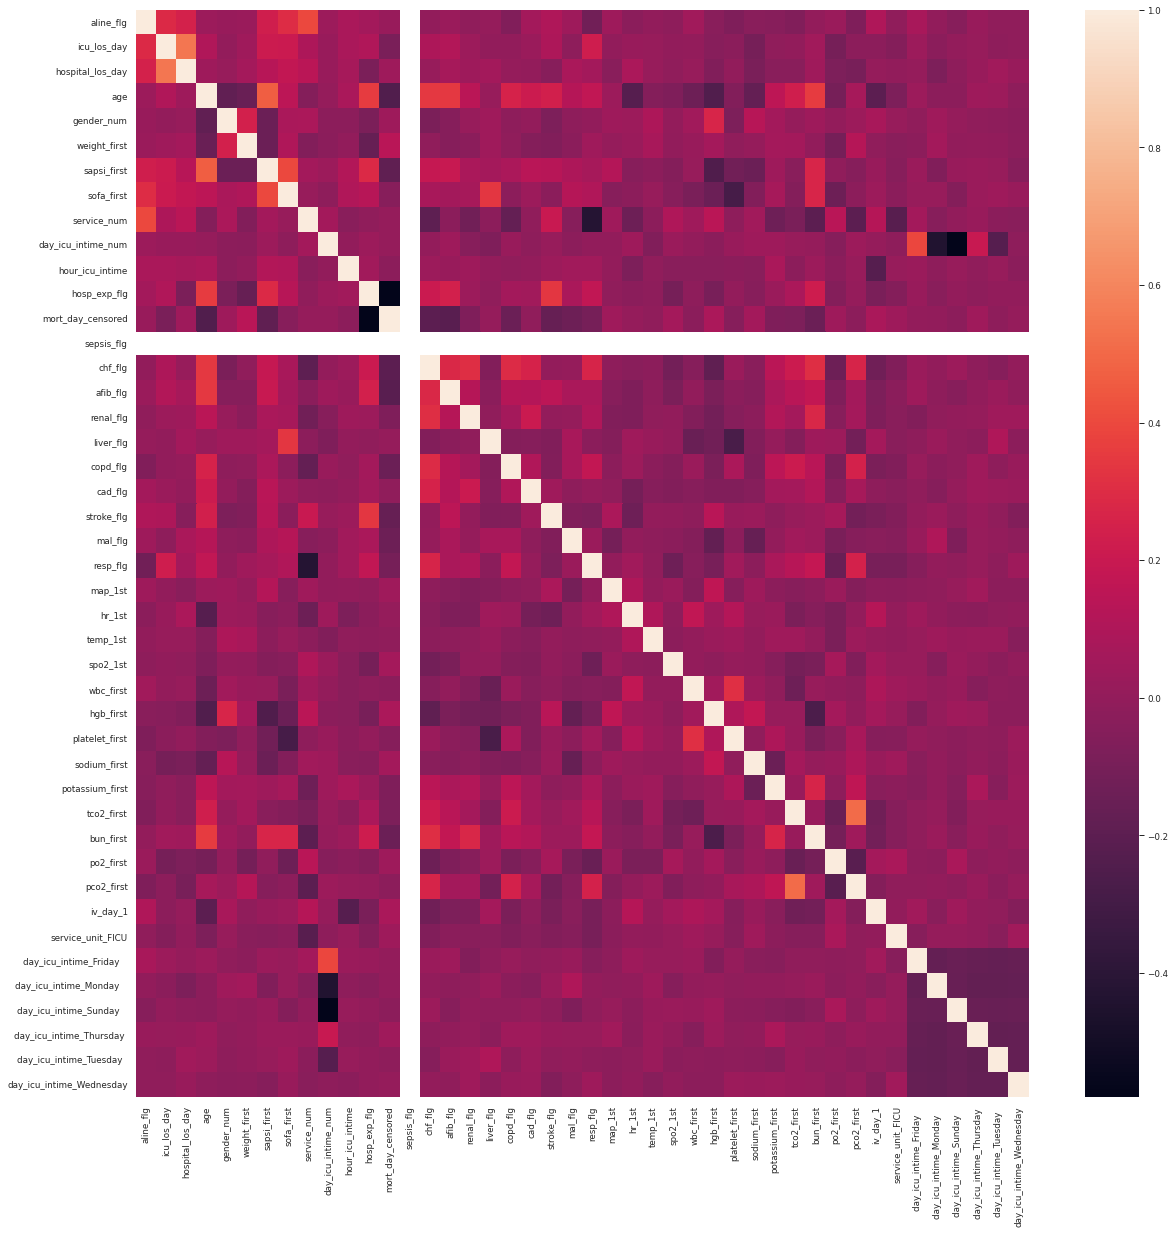

In [152]:
plt.figure(figsize=(20,20))
sns.heatmap(data_drop.corr())
plt.savefig("heatmap_drop.png")

In [158]:
y = data_filtered.loc[:,'day_28_flg']
X = data_drop.drop([], axis=1)

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [160]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

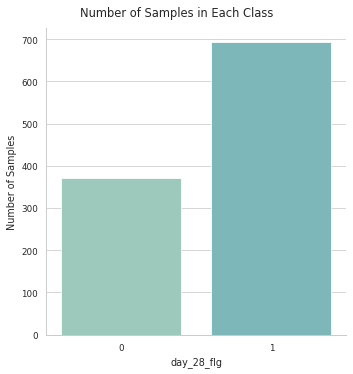

In [161]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='aline_flg', data=data, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='day_28_flg')
plt.savefig("class.png")
plt.show()

In [162]:
models = {
    '           Linear SVM': LinearSVC(),
    '        XGBClassifier': xgb.XGBClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier(),
    '                  svc':       SVC()
}

for name, model in models.items():
    model = model.fit(X_train, y_train)
    print(name + " trained")

           Linear SVM trained
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained
                  svc trained


In [163]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

           Linear SVM: 99.03%
        XGBClassifier: 99.52%
    Gradient Boosting: 99.52%
        Decision Tree: 99.52%
        Random Forest: 99.52%
 KNeighborsClassifier: 91.79%
   Bagging Classifier: 99.52%
                  svc: 98.55%


In [164]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [165]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

In [166]:
models = {
    '           Linear SVM': LinearSVC(),
    '        XGBClassifier': xgb.XGBClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier(),
    '                  svc':       SVC()
}

for name, model in models.items():
    model = model.fit(X_train_SMOTE, y_train_SMOTE)
    print(name + " trained")

           Linear SVM trained
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained
                  svc trained


In [167]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

           Linear SVM: 96.14%
        XGBClassifier: 99.52%
    Gradient Boosting: 99.52%
        Decision Tree: 99.52%
        Random Forest: 99.52%
 KNeighborsClassifier: 93.24%
   Bagging Classifier: 99.52%
                  svc: 98.07%
